In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as sp
import scipy.stats as ss
import copy
# import pandas as pd
#from math import exp
# import random

# PROBLEM 2 Analysis of spike trains.
In the next exercise, we want to do some simple analysis of real spike trains. First, download
the data-file provided on the website. The data file contains the recordings of a single neuron in the
primary somatosensory cortex of a monkey that was experiencing a vibratory stimulus on the fingertip.
There are three variables of relevance in the file: ’f1’, ’spt’, and ’t’. The variable ’f1’ is a vector that
contains the different vibration frequencies that the monkey experienced.
To load a mat file in python we need to import the loadmat function from the scipy.io package as
follows: from scipy.io import loadmat then load the file with cell = loadmat(’simadata.mat’)
In matlab it’s simpler, since we only have to load the file directly using “load”.
The variable ’spt’ contains the spike trains recorded. Note that this variable is a cell array — to
retrieve the spike trains recorded for the i-th stimulus, you need to type ’s=cell[’spt’][0,i]’ (Python) or
’s=spt{i}’ (MATLAB). Afte

In [12]:
plt.style.use('ggplot')
fig_width = 8 # width in inches
fig_height = 6 # height in inches
fig_size = [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True

sns.set(style = 'whitegrid',context = 'notebook', palette = 'dark', font_scale = 1.5)

## (a) 
Plot all the spike trains for the first stimulus (f1=8.4 Hz) into the same graph.

In [13]:
data = sp.loadmat('simdata.mat')
spt = data['spt']
t = data['t'][0]

In [14]:
f1 = spt[data['f1']==8.4][0]
time_f1 = []

for i,v in enumerate(f1):
    time_f1.append(t[f1[i] == 1])

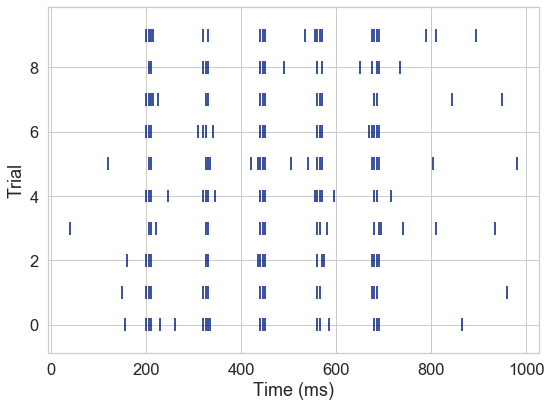

In [15]:
#f1 = data[data['f1'] == 8.4]
plt.eventplot(time_f1, linelengths = .4)
plt.xlabel('Time (ms)')
plt.ylabel('Trial')
plt.savefig('fig1_p2_report3.png', dpi = 600)
plt.show()

## (b)
Plot all the spike trains into the same graph. ( Advanced: Use alternating white and grey colors
in the background to indicate the different stimuli.)

In [ ]:
f1 = data['f1']
time_f1 = []
f1_lens = []
for i, v in enumerate(f1[0]):
    f1_x = spt[f1==v][0]
    time_f1_x = []
    f1_lens.append(len(f1_x))
    for i,v in enumerate(f1_x):
        time_f1.append(t[f1_x[i] == 1])
        
colors = plt.cm.rainbow(np.linspace(0,1,8))
colors2 = np.repeat(colors, f1_lens, axis = 0)

In [ ]:
cum = 0
handles = []
for i,v in enumerate(f1_lens):
    cum += v
    if i%2 == 0:
        h = plt.axhspan(cum, cum + v, facecolor= 'grey', alpha = 0.4)
        handles.append(copy.copy(h))
    else:
        h = plt.axhspan(cum, cum + v, facecolor= 'white', alpha = 0.4)
        plt.axhspan(cum, cum + v, facecolor= 'white', alpha = 0.4)
        handles.append(copy.copy(h))
        
for i, h in enumerate(handles):
    h.set_color(colors[i])

plt.eventplot(time_f1, color = colors2)

plt.xlabel('Time(ms)')
plt.ylabel('Trial')

plt.legend(handles = handles, labels =list(f1[0]),
           loc='center left', bbox_to_anchor=(1, 0.5) )
plt.savefig('fig2_p2_report3.png')
plt.show()

# (c)
 Count the number of spikes in each trial that fall within the stimulation period (200..700 msec). For each stimulus, compute the average spike count and the standard deviation of spike counts. Plot the tuning curve of the neuron, i.e., its average firing rate (=spike count / sec) against the stimulus frequency. ( Advanced: Additionally, add the information of the standard error of the mean (SEM) as errorbars in this plot. Remember that the standard error of the mean is defined as $SEM = σ/√N$, where N is the number of samples and σ is the standard deviation of the variable you average.)


In [ ]:
stim_time = [time_f1[i][((200 <= time_f1[i]) & (time_f1[i] <= 700))] for i,v in enumerate(time_f1)]

In [ ]:
sum_trial = [len(stim_time[i]) for i,v in enumerate(stim_time)]
cum = 0
# mean_trial = [np.mean(sum_trial[cum + v]) for i,v in enumerate(f1_lens) cum += v]
# stims_f1 =  np.repeat(f1[0], f1_lens, axis = 0)

mean_trial = []
sem_trial = []
for i,v in enumerate(f1_lens):
    mean_trial.append(np.mean(sum_trial[cum: cum + v]))
    sem_trial.append(ss.sem(sum_trial[cum: cum + v]))
    cum += v

In [ ]:
# plt.plot(f1[0], mean_trial)
plt.errorbar(f1[0], mean_trial,  sem_trial, capsize = 2)
plt.xlabel('Stimulation frequency (Hz)')
plt.ylabel('Average Spike count')
plt.savefig('fig3_p2_report3.png', dpi = 600)
plt.show()

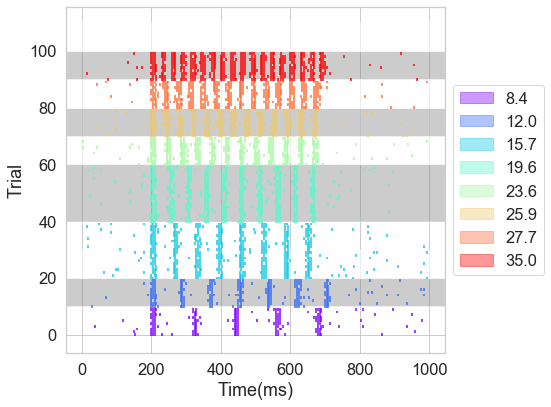

In [17]:
cum = 0
handles = []
for i,v in enumerate(f1_lens):
    cum += v
    if i%2 == 0:
        h = plt.axhspan(cum, cum + v, facecolor= 'grey', alpha = 0.4)
        handles.append(copy.copy(h))
    else:
        h = plt.axhspan(cum, cum + v, facecolor= 'white', alpha = 0.4)
        plt.axhspan(cum, cum + v, facecolor= 'white', alpha = 0.4)
        handles.append(copy.copy(h))
        
for i, h in enumerate(handles):
    h.set_color(colors[i])

plt.eventplot(time_f1, color = colors2)

plt.xlabel('Time(ms)')
plt.ylabel('Trial')

plt.legend(handles = handles, labels =list(f1[0]),
           loc='center left', bbox_to_anchor=(1, 0.5) )
plt.savefig('fig2_p2_report3.png')
plt.show()

# (c)
 Count the number of spikes in each trial that fall within the stimulation period (200..700 msec). For each stimulus, compute the average spike count and the standard deviation of spike counts. Plot the tuning curve of the neuron, i.e., its average firing rate (=spike count / sec) against the stimulus frequency. ( Advanced: Additionally, add the information of the standard error of the mean (SEM) as errorbars in this plot. Remember that the standard error of the mean is defined as $SEM = σ/√N$, where N is the number of samples and σ is the standard deviation of the variable you average.)


In [18]:
stim_time = [time_f1[i][((200 <= time_f1[i]) & (time_f1[i] <= 700))] for i,v in enumerate(time_f1)]

In [19]:
sum_trial = [len(stim_time[i]) for i,v in enumerate(stim_time)]
cum = 0
# mean_trial = [np.mean(sum_trial[cum + v]) for i,v in enumerate(f1_lens) cum += v]
# stims_f1 =  np.repeat(f1[0], f1_lens, axis = 0)

mean_trial = []
sem_trial = []
for i,v in enumerate(f1_lens):
    mean_trial.append(np.mean(sum_trial[cum: cum + v]))
    sem_trial.append(ss.sem(sum_trial[cum: cum + v]))
    cum += v

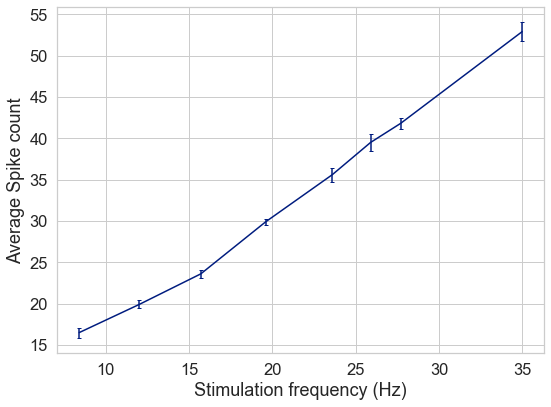

In [20]:
# plt.plot(f1[0], mean_trial)
plt.errorbar(f1[0], mean_trial,  sem_trial, capsize = 2)
plt.xlabel('Stimulation frequency (Hz)')
plt.ylabel('Average Spike count')
plt.savefig('fig3_p2_report3.png', dpi = 600)
plt.show()